# Heart Disease Risk Prediction Using Logistic Regression

This notebook implements logistic regression from scratch to predict the risk of heart disease. The dataset is taken from Kaggle and contains clinical information of patients.

In this notebook we will: 
1. Load and prepare the dataset
2. Implement logistic regression
3. Visualize decision boundaries
4. Add regularization

---

## 0. Import libraries 

In [2]:
%pip install numpy pandas matplotlib 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Load and prepare the dataset


### 1.1 Load the dataset

In [4]:
df = pd.read_csv('heart.csv')
print("Data loaded successfully.")

Data loaded successfully.


### 1.2 Show first rows

In [5]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [6]:
df.shape #(patients, features)

(270, 14)

### 1.3 Check unique values in the target column

This shows how many patients:

- Have heart disease

- Do not have heart disease

In [7]:
df['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

### 1.4 Binarizing the target column

The target column "Heart Disease" has text values:
- "Presence" -> patient has heart disease
- "Absence" -> patient does not have heart disease

Logistic regression needs numeric values.
We convert:
- Presence -> 1
- Absence -> 0

In [8]:
# Convert target column to binary
df['Heart Disease'] = df['Heart Disease'].map({
    'Presence': 1,
    'Absence': 0
})

# Check results
df['Heart Disease'].value_counts()

Heart Disease
0    150
1    120
Name: count, dtype: int64

#### 1.5 Target proportion

In [9]:
df['Heart Disease'].value_counts(normalize=True) * 100

Heart Disease
0    55.555556
1    44.444444
Name: proportion, dtype: float64

The target proportion indicates the percentage of patients with and without heart disease. This helps us understand the class distribution in the dataset. A moderately balanced dataset, like this one, ensures that the model does not become biased towards one class, which is crucial for reliable predictions.

#### 1.6 Class distribution plot

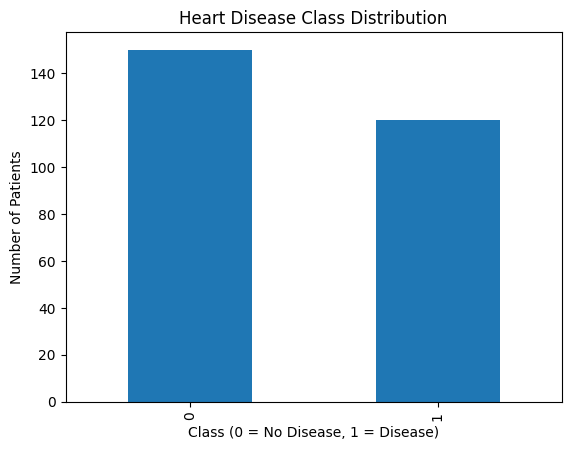

In [10]:
df['Heart Disease'].value_counts().plot(kind='bar')
plt.title("Heart Disease Class Distribution")
plt.xlabel("Class (0 = No Disease, 1 = Disease)")
plt.ylabel("Number of Patients")
plt.show()

## 2. Exploratory Data Analysis (EDA)

### 2.1 Summary statistics

In [11]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


### 2.2 Check for missing values

Count missing values in each column

In [17]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

### 2.3 Check for outliers

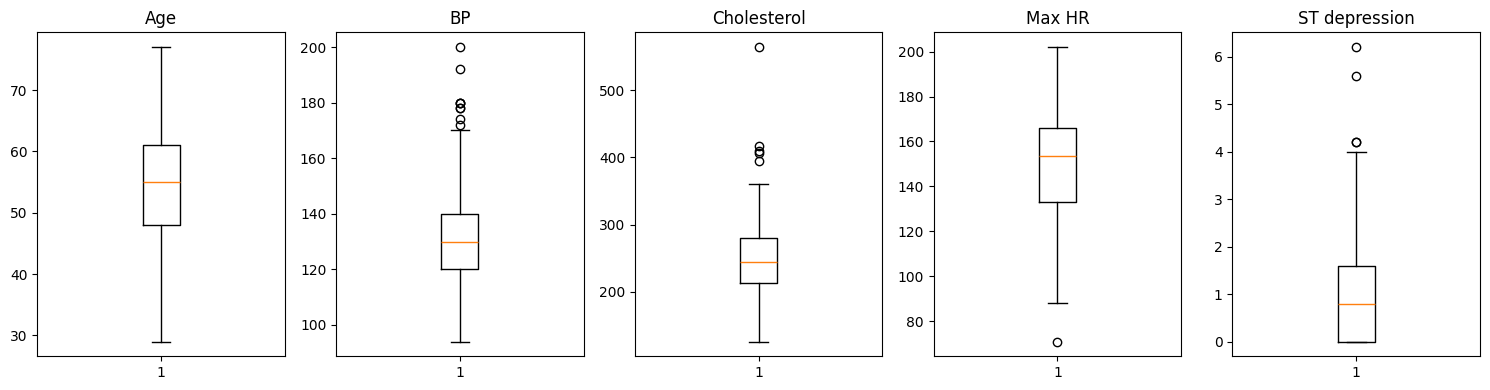

In [ ]:
numerical_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression'] # Boxplots

fig, axes = plt.subplots(1, 5, figsize=(15, 4))
for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

Some outliers are visible especially in Cholesterol. For this lab, we keep all data since outliers may represent real patient conditions.

---

## 3. Data Preparation

### 3.1 Select features

We select 6 important clinical features for our model:
- **Age**: Patient age
- **Cholesterol**: Cholesterol level
- **BP**: Blood pressure
- **Max HR**: Maximum heart rate
- **ST depression**: ST depression induced by exercise
- **Number of vessels fluro**: Number of major vessels colored by fluoroscopy

In [18]:
features = ['Age', 'Cholesterol', 'BP', 'Max HR', 'ST depression', 'Number of vessels fluro']

X = df[features].values
y = df['Heart Disease'].values

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (270, 6)
Target shape: (270,)


### 3.2 Train/Test split

We split the data keeping the same proportion of disease/no-disease in both sets.

In [ ]:
np.random.seed(42)

# Separate indices by class
idx_class_0 = np.where(y == 0)[0]
idx_class_1 = np.where(y == 1)[0]

# Shuffle indices
np.random.shuffle(idx_class_0)
np.random.shuffle(idx_class_1)

# Split each class 70/30
split_0 = int(0.7 * len(idx_class_0))
split_1 = int(0.7 * len(idx_class_1))

train_idx = np.concatenate([idx_class_0[:split_0], idx_class_1[:split_1]])
test_idx = np.concatenate([idx_class_0[split_0:], idx_class_1[split_1:]])

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Train disease rate:", y_train.mean() * 100, "%")
print("Test disease rate:", y_test.mean() * 100, "%")

Train set size: 189
Test set size: 81
Train disease rate: 44.44444444444444 %
Test disease rate: 44.44444444444444 %


### 3.3 Normalize numerical features

Normalization scales all features to a similar range. This helps gradient descent converge faster.

In [ ]:
train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis=0)

X_train_norm = (X_train - train_mean) / train_std
X_test_norm = (X_test - train_mean) / train_std

print("Training set normalized.")
print("Sample of normalized training data:")
print(X_train_norm[:3])

Training set normalized.
Sample of normalized training data:
[[-0.91125832 -1.3185691   0.5916325   0.43215038  0.31304113 -0.70475712]
 [ 1.86303006  0.33468693 -1.21827815 -0.92010826 -0.94196923  0.42404878]
 [-2.79777442 -0.81132009 -0.08708399  2.32531248 -0.94196923 -0.70475712]]
